#Imports

In [ ]:
!pip install wordcloud

In [ ]:
!pip install nltk

In [ ]:
!pip install unidecode

In [144]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk import tokenize
from nltk.tokenize import word_tokenize
import seaborn as sns
from string import punctuation
import unidecode
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import ngrams

In [ ]:
nltk.download("all")

#Importação dos dados

In [4]:
resenha = pd.read_csv("imdb-reviews-pt-br.csv")
resenha.head()

id                                            text_en  \
0   1  Once again Mr. Costner has dragged out a movie...   
1   2  This is an example of why the majority of acti...   
2   3  First of all I hate those moronic rappers, who...   
3   4  Not even the Beatles could write songs everyon...   
4   5  Brass pictures movies is not a fitting word fo...   

                                             text_pt sentiment  
0  Mais uma vez, o Sr. Costner arrumou um filme p...       neg  
1  Este é um exemplo do motivo pelo qual a maiori...       neg  
2  Primeiro de tudo eu odeio esses raps imbecis, ...       neg  
3  Nem mesmo os Beatles puderam escrever músicas ...       neg  
4  Filmes de fotos de latão não é uma palavra apr...       neg

In [12]:
print("negativa \n")
print(resenha.text_pt[189])

negativa 

Este é sem dúvida o pior filme que eu já vi. E acredite em mim, eu vi muitos filmes. A reviravolta inacreditável que o filme faz - passando de um extremamente mau filme "Formas de vida alienígenas habitam a terra", com um filme que tenta espalhar um arquicristiano "O dia do julgamento está próximo, buscar Jesus ou queimar por toda a eternidade em as dívidas ardentes do inferno "mensagem - deixou-me atordoado depois de ter sido atormentado por 85 minutos. Até mesmo os cristãos religiosos devem se envergonhar ou ficar furiosos ao ver suas crenças postadas dessa maneira. Eu não sabia o que fazer comigo quando assisti a atuação horrível que poderia ter sido realizada por crianças de 7 anos de idade. Simplesmente repugnante. Eu não sou cristão nem muito religioso. Mas se eu estivesse, não teria mais medo do Inferno. Rich Christiano mostrou ser algo muito pior.


In [13]:
print("positiva \n")
print(resenha.text_pt[49002])

positiva 

Crescendo em Nova York no final dos anos 80 e início dos anos 90, posso dizer pessoalmente que este é um dos documentários mais importantes feitos para cobrir esse lugar neste período de tempo. Não Madonna não veio com a idéia de Voguing, mas é de onde ela tirou! Em vez de combater a violência uns dos outros ou em brigas de gato, o voguing permitia que as pessoas "lutassem" dentro dos confins de tudo, menos que tocassem umas às outras, o que justificaria uma desqualificação automática. Vendo este tipo de extraordinariamente talentosas / bem orquestradas "jogadas" nos clubes foi nada menos do que espetacular e todos os grandes nomes de antigamente estão aqui ... Pepper La Beija, Paris Duprée, Xtragavaganza, etc. ..tudo comemorado nos gostos de peças de época como a música de Malcom McLarens "Deep in Vogue" ... não importava quem você era, ou de onde você era porque quando você passava por aquelas portas nesse "reino mágico" de De certa forma, você se tornou parte de algo maio

In [14]:
#verificação de equilíbrio dos dados
resenha.sentiment.value_counts()

neg    24765
pos    24694
Name: sentiment, dtype: int64

#Tratamento dos dados

In [28]:
#criação de uma coluna substituindo negativo/positivo pode 0/1 respectivamente
classificacao = resenha["sentiment"].replace(["neg", "pos"], [0, 1])

In [29]:
resenha["classificacao"] = classificacao

In [30]:
resenha.head()

id                                            text_en  \
0   1  Once again Mr. Costner has dragged out a movie...   
1   2  This is an example of why the majority of acti...   
2   3  First of all I hate those moronic rappers, who...   
3   4  Not even the Beatles could write songs everyon...   
4   5  Brass pictures movies is not a fitting word fo...   

                                             text_pt sentiment  classificao  \
0  Mais uma vez, o Sr. Costner arrumou um filme p...       neg            0   
1  Este é um exemplo do motivo pelo qual a maiori...       neg            0   
2  Primeiro de tudo eu odeio esses raps imbecis, ...       neg            0   
3  Nem mesmo os Beatles puderam escrever músicas ...       neg            0   
4  Filmes de fotos de latão não é uma palavra apr...       neg            0   

   classificacao  
0              0  
1              0  
2              0  
3              0  
4              0

In [31]:
resenha.tail()

id                                            text_en  \
49454  49456  Seeing as the vote average was pretty low, and...   
49455  49457  The plot had some wretched, unbelievable twist...   
49456  49458  I am amazed at how this movieand most others h...   
49457  49459  A Christmas Together actually came before my t...   
49458  49460  Working-class romantic drama from director Mar...   

                                                 text_pt sentiment  \
49454  Como a média de votos era muito baixa, e o fat...       pos   
49455  O enredo teve algumas reviravoltas infelizes e...       pos   
49456  Estou espantado com a forma como este filme e ...       pos   
49457  A Christmas Together realmente veio antes do m...       pos   
49458  O drama romântico da classe trabalhadora do di...       pos   

       classificao  classificacao  
49454            1              1  
49455            1              1  
49456            1              1  
49457            1              1  
49458            1              1

##Criação da "bag of words"

In [32]:
vetorizar = CountVectorizer(lowercase=False, max_features=50)
bag_of_words = vetorizar.fit_transform(resenha.text_pt)
print(bag_of_words.shape)

(49459, 50)


#Classificação texto

In [33]:
def classificar_texto(texto, coluna_texto, coluna_classificacao):
    vetorizar = CountVectorizer(lowercase=False, max_features=50)
    bag_of_words = vetorizar.fit_transform(texto[coluna_texto])
    treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words,
                                                              texto[coluna_classificacao],
                                                              random_state = 42)
    regressao_logistica = LogisticRegression(solver = "lbfgs")
    regressao_logistica.fit(treino, classe_treino)
    return regressao_logistica.score(teste, classe_teste)
print(classificar_texto(resenha, "text_pt", "classificacao"))

0.6583097452486858


#Word Cloud

In [35]:
%matplotlib inline

In [39]:
todas_palavras = ' '.join([texto for texto in resenha.text_pt])

In [41]:
len(todas_palavras)

63448424

In [49]:
nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(todas_palavras)

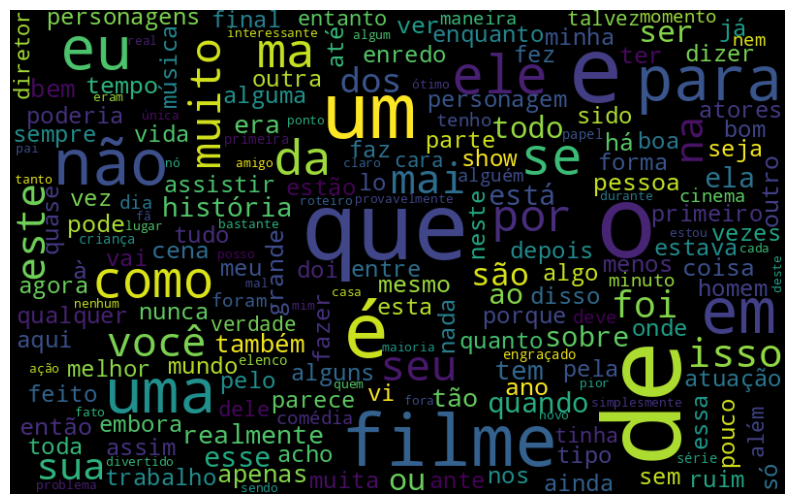

In [50]:
plt.figure(figsize=(10, 7))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis("off")
plt.show()

In [51]:
resenha.query("sentiment == 'pos'")

id                                            text_en  \
12389  12391  I went and saw this movie last night after bei...   
12390  12392  Actor turned director Bill Paxton follows up h...   
12391  12393  As a recreational golfer with some knowledge o...   
12392  12394  I saw this film in a sneak preview, and it is ...   
12393  12395  Bill Paxton has taken the true story of the 19...   
...      ...                                                ...   
49454  49456  Seeing as the vote average was pretty low, and...   
49455  49457  The plot had some wretched, unbelievable twist...   
49456  49458  I am amazed at how this movieand most others h...   
49457  49459  A Christmas Together actually came before my t...   
49458  49460  Working-class romantic drama from director Mar...   

                                                 text_pt sentiment  \
12389  Eu fui e vi este filme ontem à noite depois de...       pos   
12390  O diretor do ator, Bill Paxton, segue sua prom...       pos   
12391  Como um jogador de recreio com algum conhecime...       pos   
12392  Eu vi esse filme em uma prévia, e é delicioso....       pos   
12393  Bill Paxton levou a verdadeira história do gol...       pos   
...                                                  ...       ...   
49454  Como a média de votos era muito baixa, e o fat...       pos   
49455  O enredo teve algumas reviravoltas infelizes e...       pos   
49456  Estou espantado com a forma como este filme e ...       pos   
49457  A Christmas Together realmente veio antes do m...       pos   
49458  O drama romântico da classe trabalhadora do di...       pos   

       classificao  classificacao  
12389            1              1  
12390            1              1  
12391            1              1  
12392            1              1  
12393            1              1  
...            ...            ...  
49454            1              1  
49455            1              1  
49456            1              1  
49457            1              1  
49458            1              1  

[24694 rows x 6 columns]

In [53]:
def nuvem_palavra_neg(texto, coluna_texto):
  texto_negativo = texto.query("sentiment == 'neg'")
  todas_palavras = ' '.join([texto for texto in texto_negativo[coluna_texto]])
  nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(todas_palavras)
  plt.figure(figsize=(10, 7))
  plt.imshow(nuvem_palavras, interpolation='bilinear')
  plt.axis("off")
  plt.show()

In [59]:
def nuvem_palavra_pos(texto, coluna_texto):
  texto_positivo = texto.query("sentiment == 'pos'")
  todas_palavras = ' '.join([texto for texto in texto_positivo[coluna_texto]])
  nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(todas_palavras)
  plt.figure(figsize=(10, 7))
  plt.imshow(nuvem_palavras, interpolation='bilinear')
  plt.axis("off")
  plt.show()

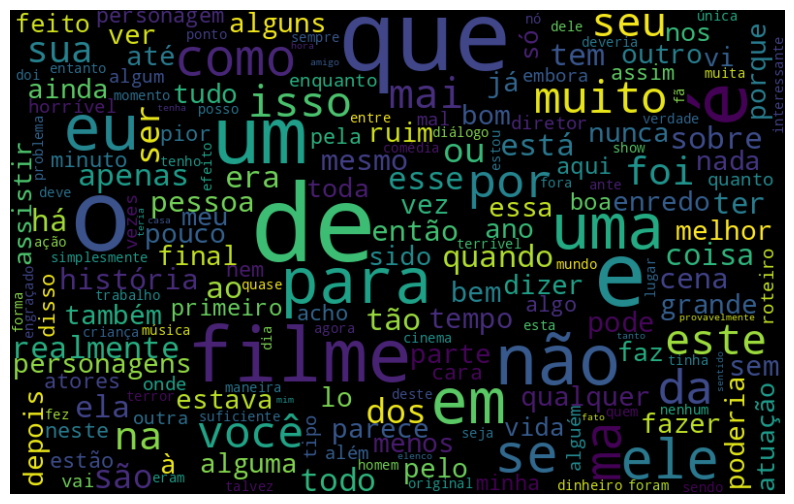

In [56]:
nuvem_palavra_neg(resenha, "text_pt")

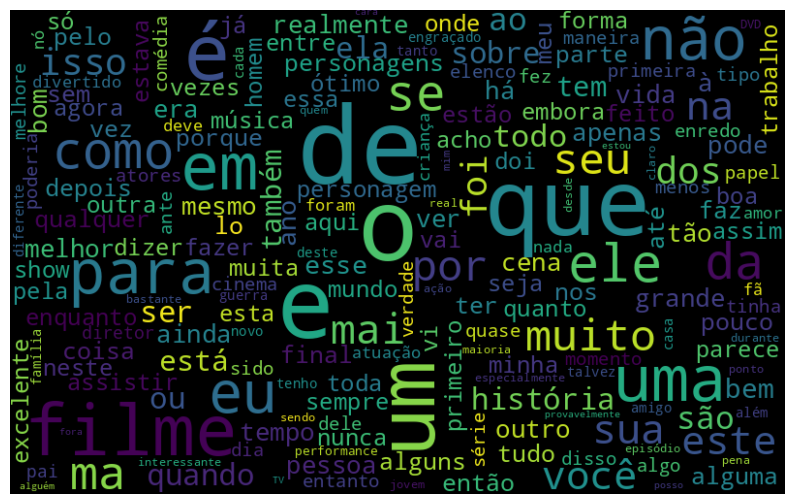

In [60]:
nuvem_palavra_pos(resenha, "text_pt")

#Tokenização

In [72]:
token_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(todas_palavras)
frequencia = nltk.FreqDist(token_frase)
df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()), "Frequencia":list(frequencia.values())})

In [69]:
frequencia

FreqDist({'de': 417651, 'que': 325070, 'e': 299743, 'o': 244881, 'um': 216410, 'a': 210179, 'é': 192381, 'em': 132778, 'uma': 130888, 'não': 127915, ...})

In [73]:
df_frequencia.head()

Palavra  Frequencia
0    Mais        1538
1     uma      130888
2    vez,        1927
3       o      244881
4     Sr.        1741

In [75]:
df_frequencia.nlargest(columns = "Frequencia", n=10)

Palavra  Frequencia
20       de      417651
14      que      325070
42        e      299743
3         o      244881
7        um      216410
102       a      210179
45        é      192381
200      em      132778
1       uma      130888
29      não      127915

#Visualização

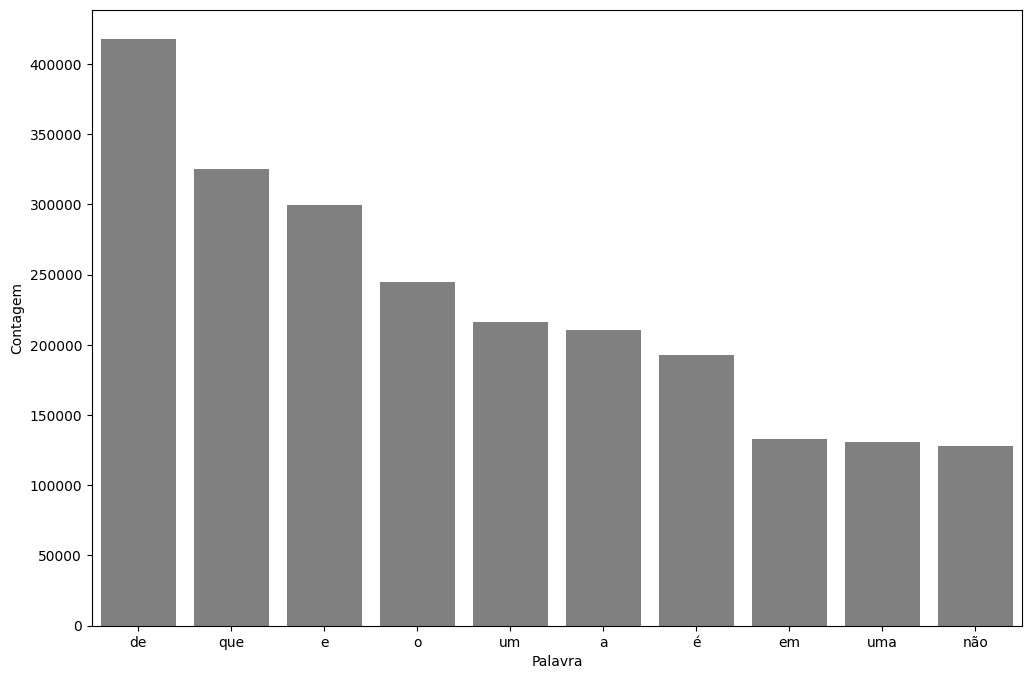

In [79]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(data = df_frequencia.nlargest(columns = "Frequencia", n=10), x = "Palavra", y = "Frequencia", color='gray')
ax.set(ylabel = "Contagem")
plt.show()

#Criando uma função para tokenizar e contabilizar as palavras

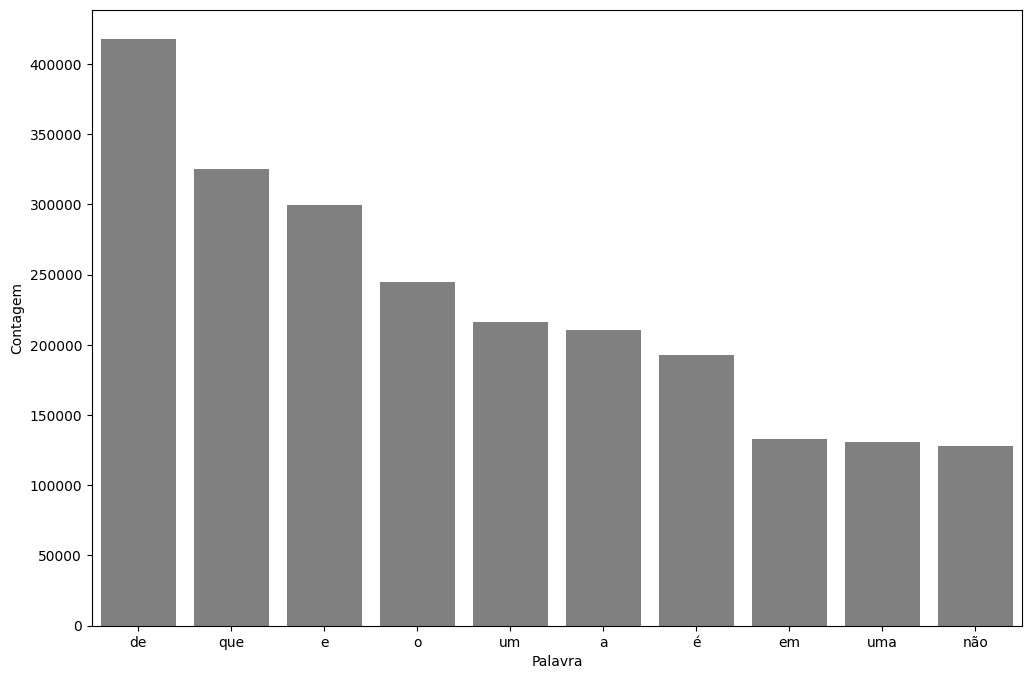

In [80]:
def pareto(texto, coluna_texto, quantidade):
    todas_palavras = ' '.join([texto for texto in texto[coluna_texto]])
    token_frase = token_espaco.tokenize(todas_palavras)
    frequencia = nltk.FreqDist(token_frase)
    df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                                   "Frequência": list(frequencia.values())})
    df_frequencia = df_frequencia.nlargest(columns = "Frequência", n = quantidade)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequencia, x = "Palavra", y = "Frequência", color = 'gray')
    ax.set(ylabel = "Contagem")
    plt.show()

pareto(resenha, "text_pt", 10)

#Tratamento

##Tratamento 1 - stopwords

In [81]:
palavras_irrelevantes = nltk.corpus.stopwords.words("portuguese")

In [ ]:
palavras_irrelevantes

In [83]:
frase_processada = list()
for opiniao in resenha.text_pt:
  nova_frase = list()
  palavras_texto = token_espaco.tokenize(opiniao)
  for palavra in palavras_texto:
    if palavra not in palavras_irrelevantes:
      nova_frase.append(palavra)
  frase_processada.append(' '.join(nova_frase))

resenha['tratamento_1'] = frase_processada

In [84]:
resenha.head()

id                                            text_en  \
0   1  Once again Mr. Costner has dragged out a movie...   
1   2  This is an example of why the majority of acti...   
2   3  First of all I hate those moronic rappers, who...   
3   4  Not even the Beatles could write songs everyon...   
4   5  Brass pictures movies is not a fitting word fo...   

                                             text_pt sentiment  classificao  \
0  Mais uma vez, o Sr. Costner arrumou um filme p...       neg            0   
1  Este é um exemplo do motivo pelo qual a maiori...       neg            0   
2  Primeiro de tudo eu odeio esses raps imbecis, ...       neg            0   
3  Nem mesmo os Beatles puderam escrever músicas ...       neg            0   
4  Filmes de fotos de latão não é uma palavra apr...       neg            0   

   classificacao                                       tratamento_1  
0              0  Mais vez, Sr. Costner arrumou filme tempo nece...  
1              0  Este exemplo motivo maioria filmes ação mesmos...  
2              0  Primeiro tudo odeio raps imbecis, poderiam agi...  
3              0  Nem Beatles puderam escrever músicas todos gos...  
4              0  Filmes fotos latão palavra apropriada eles, ve...

In [85]:
classificar_texto(resenha, "tratamento_1", "classificacao")

0.6811160533764659

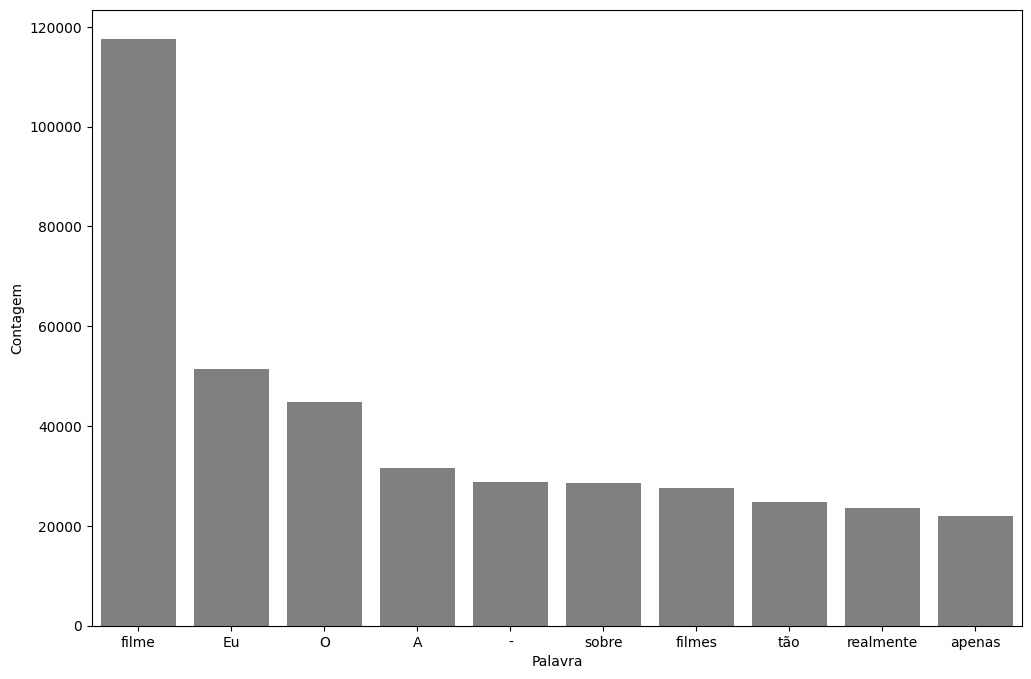

In [86]:
pareto(resenha, "tratamento_1", 10)

## Tratamento 2 - pontuações


In [104]:
pontuacao = list()
for ponto in punctuation:
  pontuacao.append(ponto)

pontuacao_stopwords = pontuacao + palavras_irrelevantes

frase_processada2 = list()
for opiniao in resenha["tratamento_1"]:
    nova_frase = list()
    palavras_texto = word_tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in pontuacao_stopwords:
            nova_frase.append(palavra)
    frase_processada2.append(' '.join(nova_frase))

resenha["tratamento_2"] = frase_processada2

In [105]:
resenha.head()

id                                            text_en  \
0   1  Once again Mr. Costner has dragged out a movie...   
1   2  This is an example of why the majority of acti...   
2   3  First of all I hate those moronic rappers, who...   
3   4  Not even the Beatles could write songs everyon...   
4   5  Brass pictures movies is not a fitting word fo...   

                                             text_pt sentiment  classificao  \
0  Mais uma vez, o Sr. Costner arrumou um filme p...       neg            0   
1  Este é um exemplo do motivo pelo qual a maiori...       neg            0   
2  Primeiro de tudo eu odeio esses raps imbecis, ...       neg            0   
3  Nem mesmo os Beatles puderam escrever músicas ...       neg            0   
4  Filmes de fotos de latão não é uma palavra apr...       neg            0   

   classificacao                                       tratamento_1  \
0              0  Mais vez, Sr. Costner arrumou filme tempo nece...   
1              0  Este exemplo motivo maioria filmes ação mesmos...   
2              0  Primeiro tudo odeio raps imbecis, poderiam agi...   
3              0  Nem Beatles puderam escrever músicas todos gos...   
4              0  Filmes fotos latão palavra apropriada eles, ve...   

                                        tratamento_2  
0  Mais vez Sr. Costner arrumou filme tempo neces...  
1  Este exemplo motivo maioria filmes ação mesmos...  
2  Primeiro tudo odeio raps imbecis poderiam agir...  
3  Nem Beatles puderam escrever músicas todos gos...  
4  Filmes fotos latão palavra apropriada verdade ...

In [106]:
resenha["tratamento_2"][0]

'Mais vez Sr. Costner arrumou filme tempo necessário Além terríveis seqüências resgate mar quais poucas simplesmente importei nenhum personagens A maioria fantasmas armário personagem Costers realizado logo início esquecido tarde importava O personagem deveríamos importar arrogante superconfiante Ashton Kutcher O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armário desordenado Seu único obstáculo parece vencendo Costner Finalmente bem além meio caminho Costner conta sobre fantasmas Kutchers Somos informados Kutcher levado melhor pressentimentos presságios anteriores Nenhuma mágica aqui tudo podia fazer desligar hora'

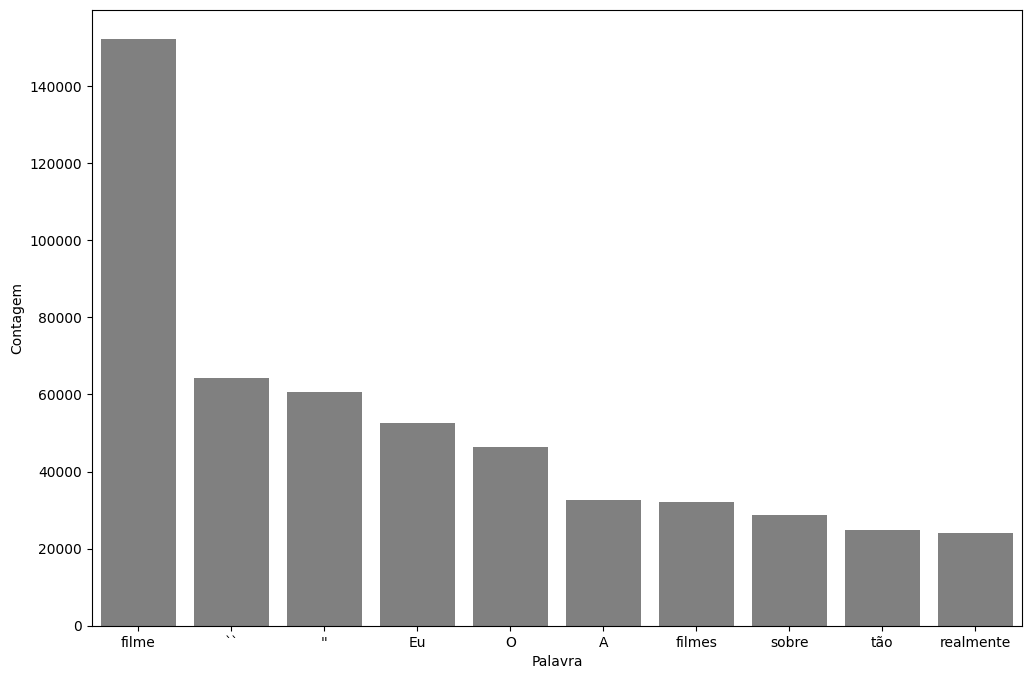

In [107]:
pareto(resenha, "tratamento_2", 10)

##Tratamento 3 - acentos

In [112]:
sem_acentos = [unidecode.unidecode(texto) for texto in resenha["tratamento_2"]]
stopwords_sem_acento = [unidecode.unidecode(texto) for texto in pontuacao_stopwords]

In [115]:
resenha["tratamento_3"] = sem_acentos

frase_processada = list()
for opiniao in resenha["tratamento_3"]:
    nova_frase = list()
    palavras_texto = word_tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in pontuacao_stopwords:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

resenha["tratamento_3"] = frase_processada

In [120]:
resenha.head()

id                                            text_en  \
0   1  Once again Mr. Costner has dragged out a movie...   
1   2  This is an example of why the majority of acti...   
2   3  First of all I hate those moronic rappers, who...   
3   4  Not even the Beatles could write songs everyon...   
4   5  Brass pictures movies is not a fitting word fo...   

                                             text_pt sentiment  classificao  \
0  Mais uma vez, o Sr. Costner arrumou um filme p...       neg            0   
1  Este é um exemplo do motivo pelo qual a maiori...       neg            0   
2  Primeiro de tudo eu odeio esses raps imbecis, ...       neg            0   
3  Nem mesmo os Beatles puderam escrever músicas ...       neg            0   
4  Filmes de fotos de latão não é uma palavra apr...       neg            0   

   classificacao                                       tratamento_1  \
0              0  Mais vez, Sr. Costner arrumou filme tempo nece...   
1              0  Este exemplo motivo maioria filmes ação mesmos...   
2              0  Primeiro tudo odeio raps imbecis, poderiam agi...   
3              0  Nem Beatles puderam escrever músicas todos gos...   
4              0  Filmes fotos latão palavra apropriada eles, ve...   

                                        tratamento_2  \
0  Mais vez Sr. Costner arrumou filme tempo neces...   
1  Este exemplo motivo maioria filmes ação mesmos...   
2  Primeiro tudo odeio raps imbecis poderiam agir...   
3  Nem Beatles puderam escrever músicas todos gos...   
4  Filmes fotos latão palavra apropriada verdade ...   

                                        tratamento_3  
0  Mais vez Sr. Costner arrumou filme tempo neces...  
1  Este exemplo motivo maioria filmes acao mesmos...  
2  Primeiro tudo odeio raps imbecis poderiam agir...  
3  Nem Beatles puderam escrever musicas todos gos...  
4  Filmes fotos latao palavra apropriada verdade ...

In [116]:
acuracia_tratamento3 = classificar_texto(resenha, "tratamento_3", "classificacao")
print(acuracia_tratamento3)

0.6887990295188031


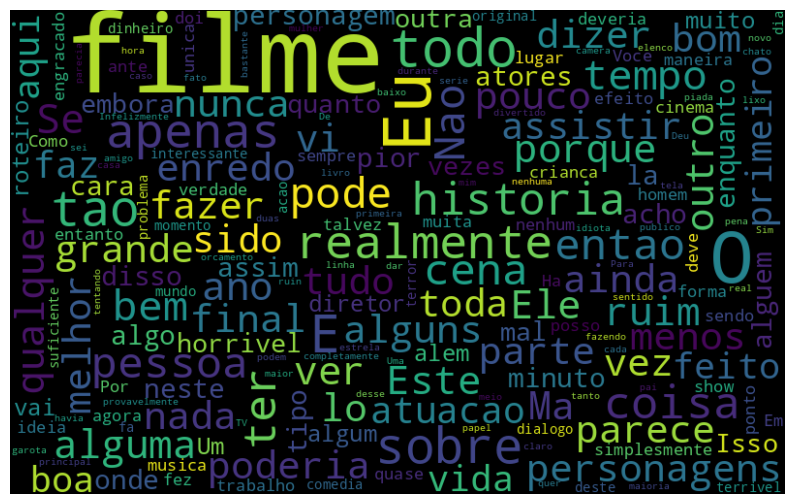

In [118]:
nuvem_palavra_neg(resenha, "tratamento_3")

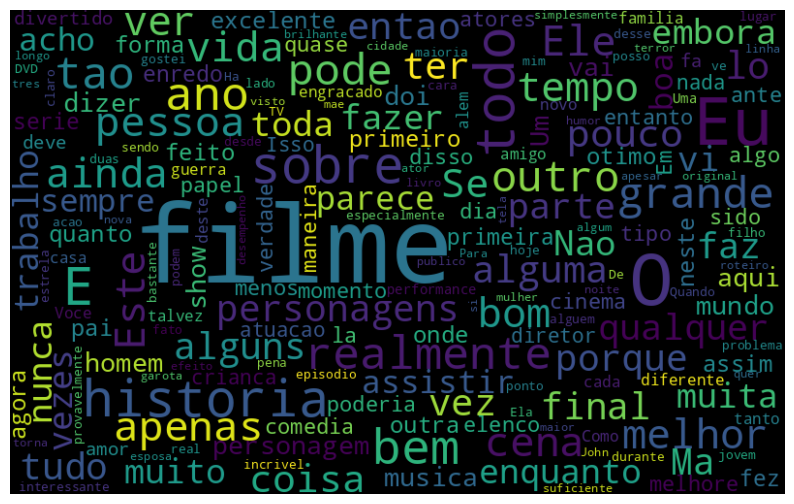

In [119]:
nuvem_palavra_pos(resenha, "tratamento_3")

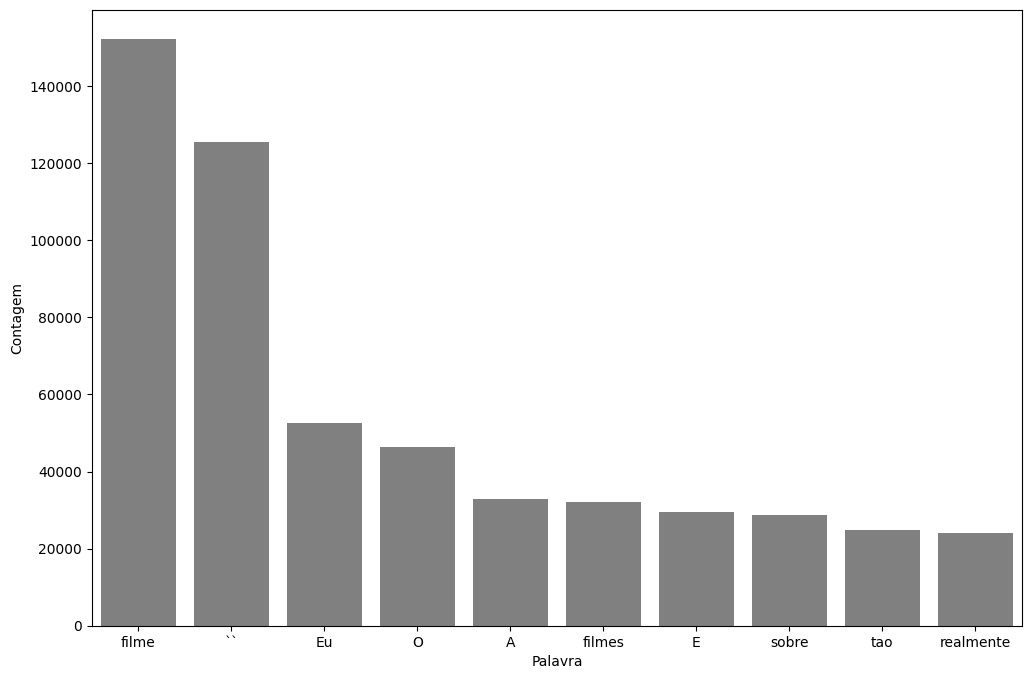

In [123]:
pareto(resenha, "tratamento_3", 10)

##Tratamento 4 - minúsculo

In [127]:
frase_processada = list()
for opiniao in resenha["tratamento_3"]:
    nova_frase = list()
    opiniao = opiniao.lower()
    palavras_texto = word_tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in stopwords_sem_acento:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

resenha["tratamento_4"] = frase_processada

In [128]:
resenha.head()

id                                            text_en  \
0   1  Once again Mr. Costner has dragged out a movie...   
1   2  This is an example of why the majority of acti...   
2   3  First of all I hate those moronic rappers, who...   
3   4  Not even the Beatles could write songs everyon...   
4   5  Brass pictures movies is not a fitting word fo...   

                                             text_pt sentiment  classificao  \
0  Mais uma vez, o Sr. Costner arrumou um filme p...       neg            0   
1  Este é um exemplo do motivo pelo qual a maiori...       neg            0   
2  Primeiro de tudo eu odeio esses raps imbecis, ...       neg            0   
3  Nem mesmo os Beatles puderam escrever músicas ...       neg            0   
4  Filmes de fotos de latão não é uma palavra apr...       neg            0   

   classificacao                                       tratamento_1  \
0              0  Mais vez, Sr. Costner arrumou filme tempo nece...   
1              0  Este exemplo motivo maioria filmes ação mesmos...   
2              0  Primeiro tudo odeio raps imbecis, poderiam agi...   
3              0  Nem Beatles puderam escrever músicas todos gos...   
4              0  Filmes fotos latão palavra apropriada eles, ve...   

                                        tratamento_2  \
0  Mais vez Sr. Costner arrumou filme tempo neces...   
1  Este exemplo motivo maioria filmes ação mesmos...   
2  Primeiro tudo odeio raps imbecis poderiam agir...   
3  Nem Beatles puderam escrever músicas todos gos...   
4  Filmes fotos latão palavra apropriada verdade ...   

                                        tratamento_3  \
0  Mais vez Sr. Costner arrumou filme tempo neces...   
1  Este exemplo motivo maioria filmes acao mesmos...   
2  Primeiro tudo odeio raps imbecis poderiam agir...   
3  Nem Beatles puderam escrever musicas todos gos...   
4  Filmes fotos latao palavra apropriada verdade ...   

                                        tratamento_4  
0  vez sr. costner arrumou filme tempo necessario...  
1  exemplo motivo maioria filmes acao mesmos gene...  
2  primeiro tudo odeio raps imbecis poderiam agir...  
3  beatles puderam escrever musicas todos gostass...  
4  filmes fotos latao palavra apropriada verdade ...

In [129]:
acuracia_tratamento4 = classificar_texto(resenha, "tratamento_4", "classificacao")
print(acuracia_tratamento4)
print(acuracia_tratamento3)

0.6874241811564901
0.6887990295188031


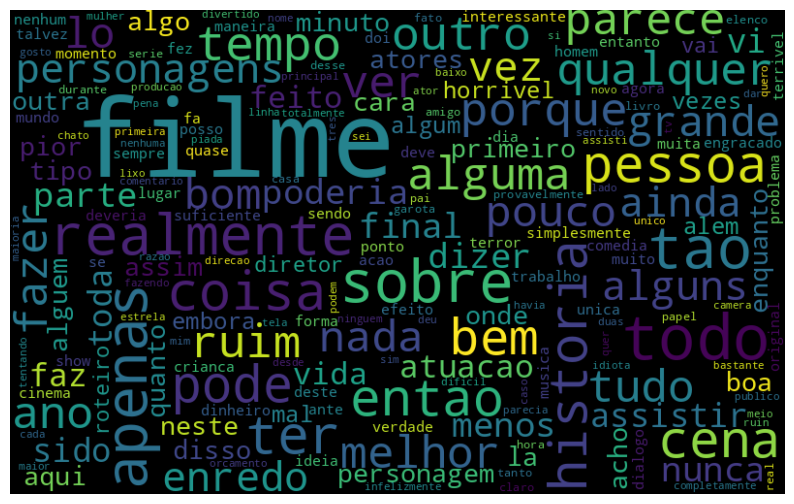

In [131]:
nuvem_palavra_neg(resenha, "tratamento_4")

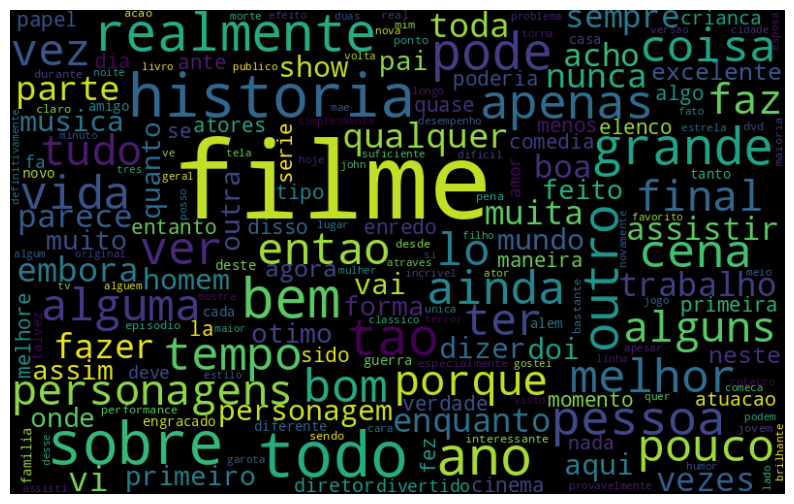

In [132]:
nuvem_palavra_pos(resenha, "tratamento_4")

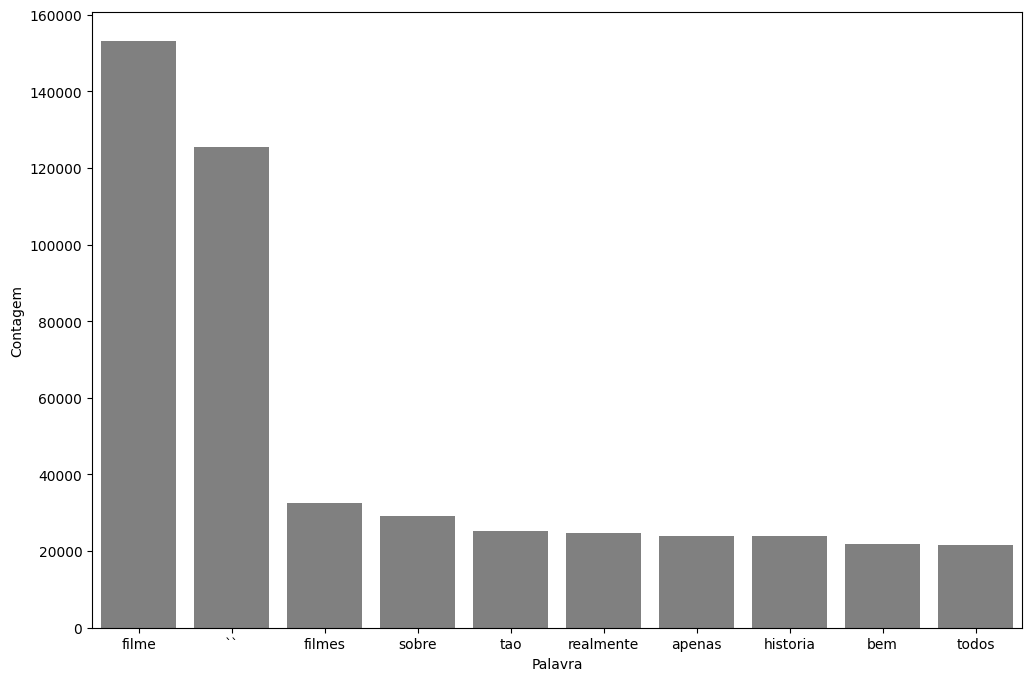

In [133]:
pareto(resenha, "tratamento_4", 10)

##Tratamento 5 - Stemmer

In [135]:
stemmer = nltk.RSLPStemmer()
frase_processada = list()
for opiniao in resenha["tratamento_4"]:
    nova_frase = list()
    palavras_texto = word_tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in stopwords_sem_acento:
            nova_frase.append(stemmer.stem(palavra))
    frase_processada.append(' '.join(nova_frase))

resenha["tratamento_5"] = frase_processada

In [136]:
acuracia_tratamento5 = classificar_texto(resenha, "tratamento_5", "classificacao")
print(acuracia_tratamento5)
print(acuracia_tratamento4)

0.6959158916295997
0.6874241811564901


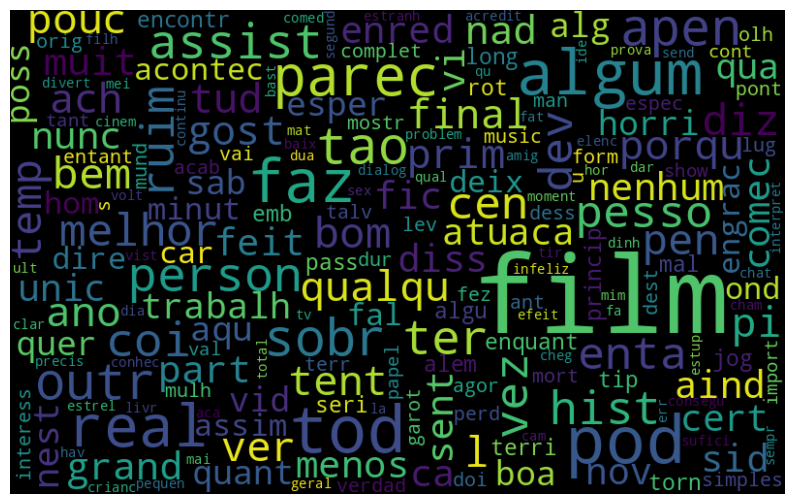

In [137]:
nuvem_palavra_neg(resenha, "tratamento_5")

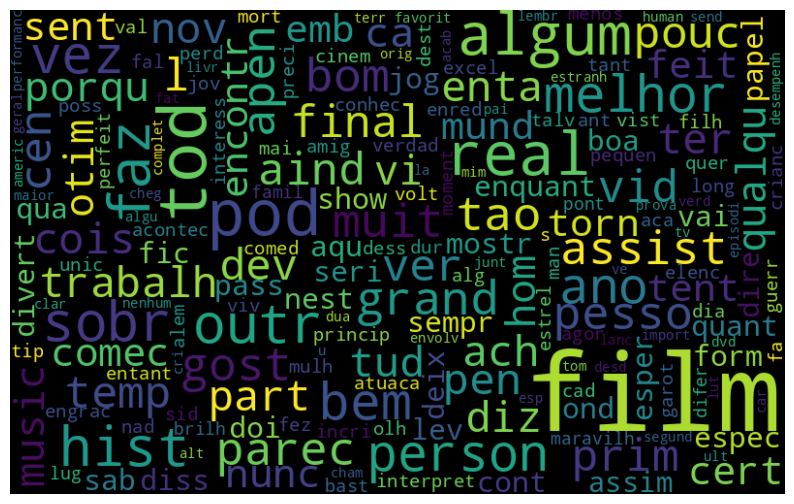

In [138]:
nuvem_palavra_pos(resenha, "tratamento_5")

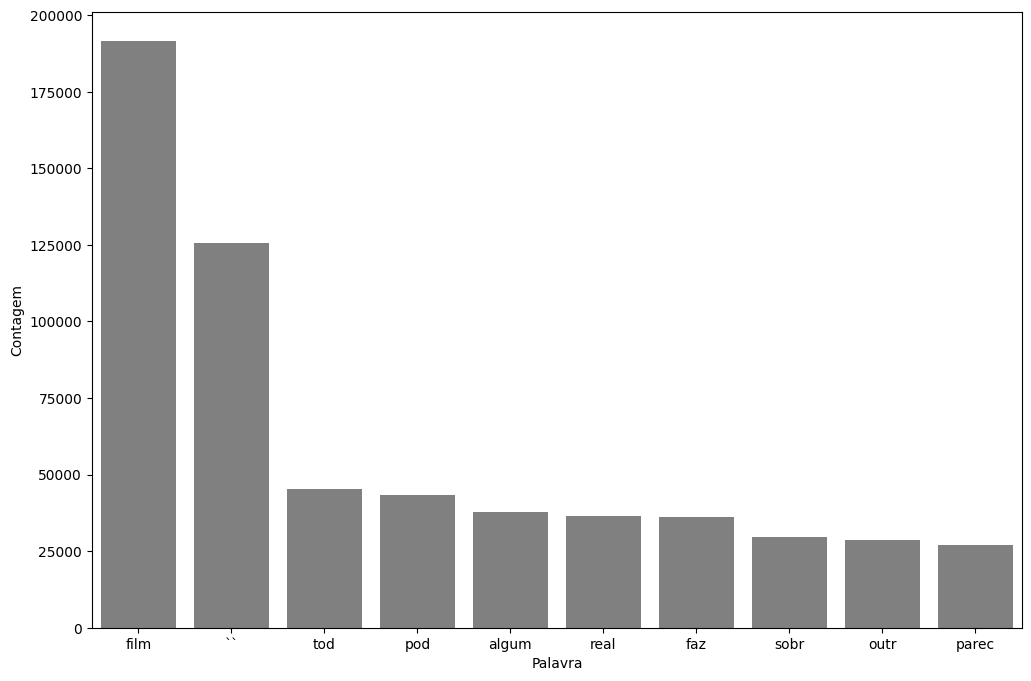

In [139]:
pareto(resenha, "tratamento_5", 10)

##Tratamento 6 - TF-IDF

In [141]:
tfidf = TfidfVectorizer(lowercase=False, max_features=50)

In [142]:
tfidf_bruto = tfidf.fit_transform(resenha["text_pt"])
treino, teste, classe_treino, classe_teste = train_test_split(tfidf_bruto, resenha["classificacao"], random_state = 42)

regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_bruto = regressao_logistica.score(teste, classe_teste)
print(acuracia_tfidf_bruto)

0.6600889607763849


In [143]:
tfidf_tratados = tfidf.fit_transform(resenha["tratamento_5"])
treino, teste, classe_treino, classe_teste = train_test_split(tfidf_tratados, resenha["classificacao"], random_state = 42)

regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_tratados = regressao_logistica.score(teste, classe_teste)
print(acuracia_tfidf_tratados)

0.6958350181965225


##Tratamento 7 - ngrams

In [145]:
tfidf = TfidfVectorizer(lowercase=False, ngram_range = (1,2))
vetor_tfidf = tfidf.fit_transform(resenha["tratamento_5"])
treino, teste, classe_treino, classe_teste = train_test_split(vetor_tfidf, resenha["classificacao"], random_state = 42)
regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_ngrams = regressao_logistica.score(teste, classe_teste)
print(acuracia_tfidf_ngrams)

0.8860493327941771


In [146]:
tfidf = TfidfVectorizer(lowercase=False)
vetor_tfidf = tfidf.fit_transform(resenha["tratamento_5"])
treino, teste, classe_treino, classe_teste = train_test_split(vetor_tfidf, resenha["classificacao"], random_state = 42)
regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf = regressao_logistica.score(teste, classe_teste)
print(acuracia_tfidf)

0.8844318641326324


In [148]:
pesos = pd.DataFrame(
    regressao_logistica.coef_[0].T,
    index=tfidf.get_feature_names_out()
)
pesos.nlargest(10, 0)

0
otim      8.364688
excel     7.968054
perfeit   6.498840
favorit   5.814441
maravilh  5.378026
incri     5.068684
hilari    4.566236
divert    4.560572
ador      4.420509
brilh     4.275194

In [149]:
pesos.nsmallest(10,0)

0
ruim    -9.294084
pi      -9.260268
horri   -8.785666
terri   -7.245467
chat    -6.888736
nad     -6.023202
infeliz -5.340687
decepca -4.988878
parec   -4.979583
nenhum  -4.972692